Import independencies


In [48]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
from keras.models import Sequential
import matplotlib.dates as mdates
from keras.layers import Dense,Dropout
from keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler
from keras.layers import GRU

Import data


In [19]:
df_btc = pd.read_csv('BTC2019-2024.csv')
df_btc.info()
df_btc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1815 non-null   int64  
 1   Date        1815 non-null   object 
 2   Open        1815 non-null   float64
 3   High        1815 non-null   float64
 4   Low         1815 non-null   float64
 5   Close       1815 non-null   float64
 6   Adj Close   1815 non-null   float64
 7   Volume      1815 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 113.6+ KB


,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2019-03-01,3853.757080,3907.795410,3851.692383,3859.583740,3859.583740,7661247975
1,1,2019-03-02,3855.318115,3874.607422,3832.127930,3864.415039,3864.415039,7578786076
2,2,2019-03-03,3862.266113,3875.483643,3836.905762,3847.175781,3847.175781,7253558152
3,3,2019-03-04,3845.091553,3867.381836,3733.749756,3761.557129,3761.557129,9029175788
4,4,2019-03-05,3759.832520,3903.916748,3745.183105,3896.375000,3896.375000,10174126415


In [20]:
df_bnb = pd.read_csv('BNB2019-2024.csv')
df_bnb.info()
df_bnb.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1815 non-null   int64  
 1   Date        1815 non-null   object 
 2   Open        1815 non-null   float64
 3   High        1815 non-null   float64
 4   Low         1815 non-null   float64
 5   Close       1815 non-null   float64
 6   Adj Close   1815 non-null   float64
 7   Volume      1815 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 113.6+ KB


,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2019-03-01,10.356931,11.607489,10.325634,11.393217,11.393217,117838677
1,1,2019-03-02,11.384693,11.915753,10.960816,11.869744,11.869744,120807894
2,2,2019-03-03,11.845305,11.964979,11.352064,11.537903,11.537903,89868246
3,3,2019-03-04,11.538013,11.599405,11.070543,11.545945,11.545945,89421231
4,4,2019-03-05,11.520388,13.841443,11.520388,13.811967,13.811967,237026335


In [21]:
df_eth = pd.read_csv('ETH2019-2024.csv')
df_eth.info()
df_eth.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1815 non-null   int64  
 1   Date        1815 non-null   object 
 2   Open        1815 non-null   float64
 3   High        1815 non-null   float64
 4   Low         1815 non-null   float64
 5   Close       1815 non-null   float64
 6   Adj Close   1815 non-null   float64
 7   Volume      1815 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 113.6+ KB


,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2019-03-01,136.836243,138.995270,136.434784,136.443619,136.443619,3756124824
1,1,2019-03-02,136.350082,137.184799,132.436386,134.206955,134.206955,3747176425
2,2,2019-03-03,134.786118,135.849289,131.328857,132.249420,132.249420,3454374053
3,3,2019-03-04,132.157883,132.729141,125.402702,127.774124,127.774124,4008171341
4,4,2019-03-05,127.792953,138.229980,126.735298,137.822388,137.822388,4764849990


In [22]:
df_btc.describe()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume
count,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1.815000e+03
mean,907.000000,25770.850601,26354.293694,25152.083263,25794.935568,25794.935568,2.969893e+10
std,524.089687,15957.123757,16357.788930,15500.299472,15956.336862,15956.336862,1.780033e+10
min,0.000000,3759.832520,3867.381836,3733.749756,3761.557129,3761.557129,5.331173e+09
25%,453.500000,10248.291015,10420.077149,10018.912110,10251.122558,10251.122558,1.787210e+10
50%,907.000000,23446.320313,23919.890625,22985.070313,23471.871094,23471.871094,2.612345e+10
75%,1360.500000,38337.583985,39496.312500,37265.291016,38351.751953,38351.751953,3.668631e+10
max,1814.000000,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [23]:
df_bnb.describe()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume
count,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1.815000e+03
mean,907.000000,211.126504,217.095221,204.768936,211.285576,211.285576,1.127327e+09
std,524.089687,171.852555,177.127735,165.990498,171.747380,171.747380,1.392933e+09
min,0.000000,9.365420,10.236060,6.963391,9.386050,9.386050,8.942123e+07
25%,453.500000,24.755992,25.801561,23.650312,24.914812,24.914812,3.232541e+08
50%,907.000000,241.489670,245.642197,237.140396,241.544510,241.544510,5.793600e+08
75%,1360.500000,317.066117,325.004684,310.196945,317.167710,317.167710,1.470920e+09
max,1814.000000,676.315918,690.931946,634.549500,675.684082,675.684082,1.798295e+10


In [24]:
df_eth.describe()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume
count,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1.815000e+03
mean,907.000000,1476.663778,1517.513220,1432.315756,1477.915707,1477.915707,1.457837e+10
std,524.089687,1156.946365,1190.363297,1118.933012,1156.457666,1156.457666,9.837620e+09
min,0.000000,110.406784,116.021622,95.184303,110.605873,110.605873,2.081626e+09
25%,453.500000,253.753479,263.718200,244.413322,255.537415,255.537415,7.602948e+09
50%,907.000000,1567.680786,1607.033081,1537.182251,1567.846069,1567.846069,1.209821e+10
75%,1360.500000,2118.864868,2171.555664,2058.898804,2120.293701,2120.293701,1.853139e+10
max,1814.000000,4810.071289,4891.704590,4718.039063,4812.087402,4812.087402,8.448291e+10


Plot data


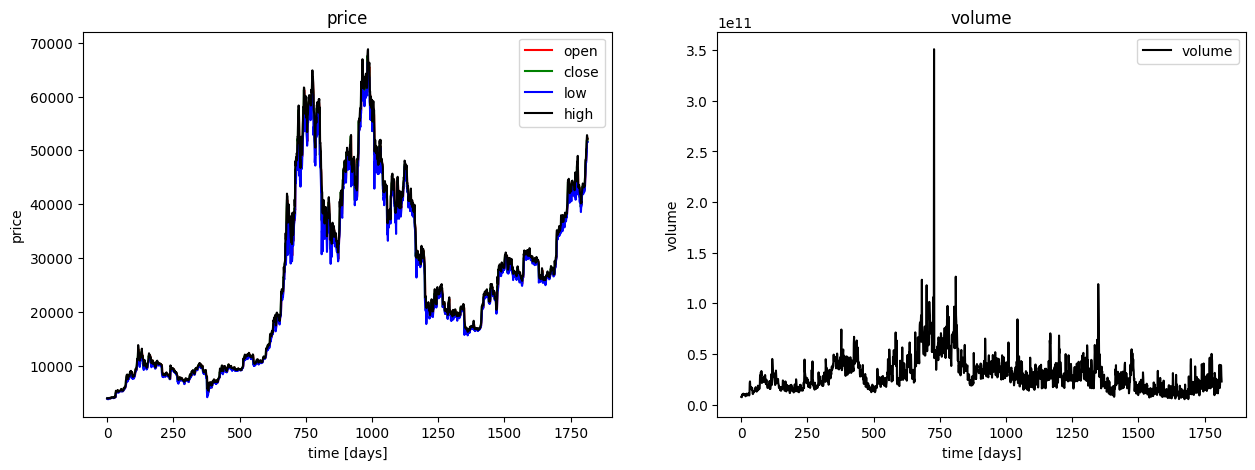

In [25]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df_btc.Open.values, color='red', label='open')
plt.plot(df_btc.Close.values, color='green', label='close')
plt.plot(df_btc.Low.values, color='blue', label='low')
plt.plot(df_btc.High.values, color='black', label='high')
plt.title('price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(1,2,2);
plt.plot(df_btc.Volume.values, color='black', label='volume')
plt.title('volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

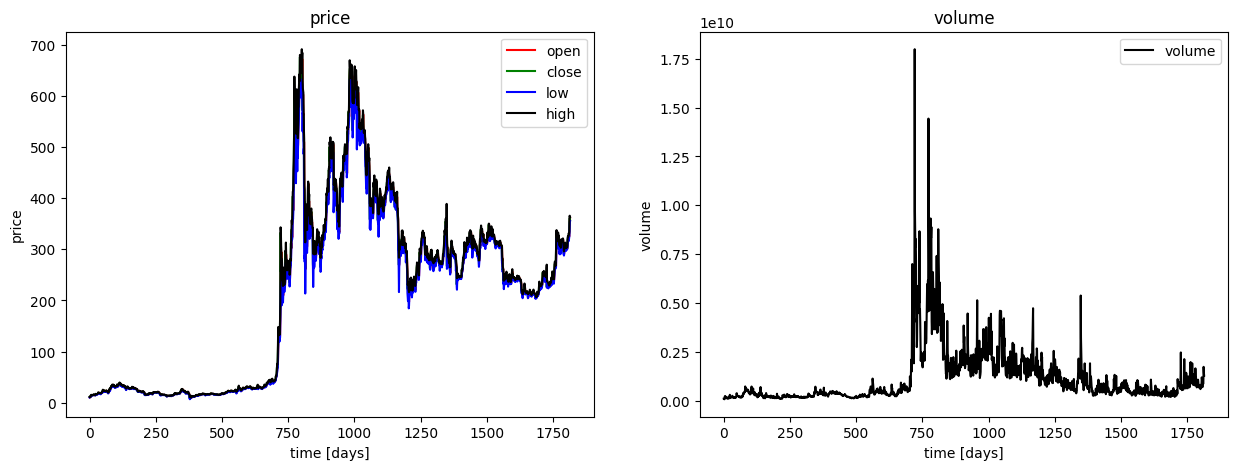

In [26]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df_bnb.Open.values, color='red', label='open')
plt.plot(df_bnb.Close.values, color='green', label='close')
plt.plot(df_bnb.Low.values, color='blue', label='low')
plt.plot(df_bnb.High.values, color='black', label='high')
plt.title('price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(1,2,2);
plt.plot(df_bnb.Volume.values, color='black', label='volume')
plt.title('volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

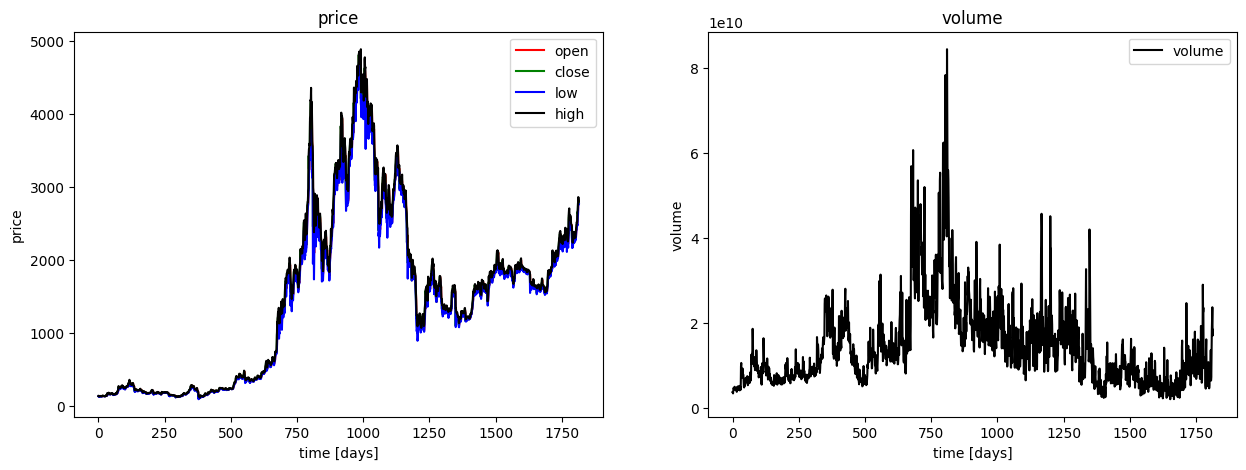

In [27]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df_eth.Open.values, color='red', label='open')
plt.plot(df_eth.Close.values, color='green', label='close')
plt.plot(df_eth.Low.values, color='blue', label='low')
plt.plot(df_eth.High.values, color='black', label='high')
plt.title('price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(1,2,2);
plt.plot(df_eth.Volume.values, color='black', label='volume')
plt.title('volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

Preprocessing

In [28]:
target_data_btc = df_btc[['Close']]
target_data_btc.head()

,Close
0,3859.583740
1,3864.415039
2,3847.175781
3,3761.557129
4,3896.375000


In [29]:
target_data_bnb = df_bnb[['Close']]
target_data_bnb.head()

,Close
0,11.393217
1,11.869744
2,11.537903
3,11.545945
4,13.811967


In [30]:
target_data_eth = df_eth[['Close']]
target_data_eth.head()

,Close
0,136.443619
1,134.206955
2,132.249420
3,127.774124
4,137.822388


In [31]:
scaler = MinMaxScaler(feature_range=(0, 1))
target_data_btc  = scaler.fit_transform(target_data_btc)
target_data_bnb  = scaler.fit_transform(target_data_bnb)
target_data_eth  = scaler.fit_transform(target_data_eth)


In [37]:
# Create training set

test_len  = 90
train_len = target_data_btc.shape[0] - test_len
timesteps = 90
features  = 1

X_train_btc = []
y_train_btc = []

for i in range(timesteps, train_len):
  X_train_btc.append(target_data_btc[i-timesteps:i, :])
  y_train_btc.append(target_data_btc[i, :])

X_train_btc = np.asarray(X_train_btc)
y_train_btc = np.asarray(y_train_btc)

# Reshaping
X_train_btc = np.reshape(X_train_btc, (X_train_btc.shape[0], X_train_btc.shape[1], 1))
print(X_train_btc.shape, y_train_btc.shape)

(1635, 90, 1) (1635, 1)


In [38]:
X_test_btc = []
y_test_btc = []

for i in range(train_len, target_data_btc.shape[0]):
  X_test_btc.append(target_data_btc[i-timesteps:i, :])
  y_test_btc.append(target_data_btc[i, :])

X_test_btc = np.asarray(X_test_btc)
y_test_btc = np.asarray(y_test_btc)

print(X_test_btc.shape, y_test_btc.shape)

(90, 90, 1) (90, 1)


In [39]:
X_train_bnb = []
y_train_bnb = []

for i in range(timesteps, train_len):
  X_train_bnb.append(target_data_bnb[i-timesteps:i, :])
  y_train_bnb.append(target_data_bnb[i, :])

X_train_bnb = np.asarray(X_train_bnb)
y_train_bnb = np.asarray(y_train_bnb)

# Reshaping
X_train_bnb = np.reshape(X_train_bnb, (X_train_bnb.shape[0], X_train_bnb.shape[1], 1))
print(X_train_bnb.shape, y_train_bnb.shape)

X_test_bnb = []
y_test_bnb = []

for i in range(train_len, target_data_bnb.shape[0]):
  X_test_bnb.append(target_data_bnb[i-timesteps:i, :])
  y_test_bnb.append(target_data_bnb[i, :])

X_test_bnb = np.asarray(X_test_bnb)
y_test_bnb = np.asarray(y_test_bnb)

print(X_test_bnb.shape, y_test_bnb.shape)

(1635, 90, 1) (1635, 1)
(90, 90, 1) (90, 1)


In [40]:
X_train_eth = []
y_train_eth = []

for i in range(timesteps, train_len):
  X_train_eth.append(target_data_eth[i-timesteps:i, :])
  y_train_eth.append(target_data_eth[i, :])

X_train_eth = np.asarray(X_train_eth)
y_train_eth = np.asarray(y_train_eth)

# Reshaping
X_train_eth = np.reshape(X_train_eth, (X_train_eth.shape[0], X_train_eth.shape[1], 1))
print(X_train_eth.shape, y_train_eth.shape)

X_test_eth = []
y_test_eth = []

for i in range(train_len, target_data_eth.shape[0]):
  X_test_eth.append(target_data_eth[i-timesteps:i, :])
  y_test_eth.append(target_data_eth[i, :])

X_test_eth = np.asarray(X_test_eth)
y_test_eth = np.asarray(y_test_eth)

print(X_test_eth.shape, y_test_eth.shape)

(1635, 90, 1) (1635, 1)
(90, 90, 1) (90, 1)


Train GRU model for predicting BTC price


In [11]:
# The GRU architecture
model_GRU = Sequential()
# First GRU layer with Dropout regularisation
model_GRU.add(GRU(50, return_sequences=True, input_shape=(X_train_btc.shape[1],1), activation='tanh'))
model_GRU.add(Dropout(0.2))
# Second GRU layer
model_GRU.add(GRU(50, return_sequences=True, activation='tanh'))
model_GRU.add(Dropout(0.2))
# Third GRU layer
model_GRU.add(GRU(50, return_sequences=True, activation='tanh'))
model_GRU.add(Dropout(0.2))
# Fourth GRU layer
model_GRU.add(GRU(50, activation='tanh'))
model_GRU.add(Dropout(0.2))
# The output layer
model_GRU.add(Dense(1))

In [54]:
optimizer=SGD(learning_rate=0.01, momentum=0.9)

In [15]:
# Compiling model
model_GRU.compile(optimizer= optimizer,loss='mean_squared_error')
# Fitting to the training set
model_GRU.fit(X_train_btc,y_train_btc,epochs=50,batch_size=150)

Epoch 1/50
11/11 [==============================] - 11s 364ms/step - loss: 0.1082
Epoch 2/50
11/11 [==============================] - 4s 354ms/step - loss: 0.0508
Epoch 3/50
11/11 [==============================] - 3s 290ms/step - loss: 0.0307
Epoch 4/50
11/11 [==============================] - 5s 428ms/step - loss: 0.0154
Epoch 5/50
11/11 [==============================] - 8s 767ms/step - loss: 0.0059
Epoch 6/50
11/11 [==============================] - 6s 534ms/step - loss: 0.0036
Epoch 7/50
11/11 [==============================] - 7s 551ms/step - loss: 0.0041
Epoch 8/50
11/11 [==============================] - 3s 294ms/step - loss: 0.0035
Epoch 9/50
11/11 [==============================] - 3s 293ms/step - loss: 0.0033
Epoch 10/50
11/11 [==============================] - 5s 445ms/step - loss: 0.0032
Epoch 11/50
11/11 [==============================] - 3s 297ms/step - loss: 0.0033
Epoch 12/50
11/11 [==============================] - 3s 298ms/step - loss: 0.0033
Epoch 13/50
11/11 [=====

In [16]:
y_pred_btc_GRU = model_GRU.predict(X_test_btc)
y_pred_btc_GRU = scaler.inverse_transform(y_pred_btc_GRU)
y_test_btc_GRU = scaler.inverse_transform(y_test_btc)

3/3 [==============================] - 2s 33ms/step


In [17]:
# Calculate RMSE
rmse = np.sqrt(np.mean(((y_pred_btc_GRU - y_test_btc_GRU) ** 2)))
print('Root Mean Squared Error:', rmse)

# Calculate MAPE
mape = np.mean(np.abs((y_test_btc_GRU - y_pred_btc_GRU) / y_test_btc_GRU))

print('Mean Absolute Percentage Error (MAPE):', mape)

Root Mean Squared Error: 2213.3948170220683
Mean Absolute Percentage Error (MAPE): 0.03842338545804228


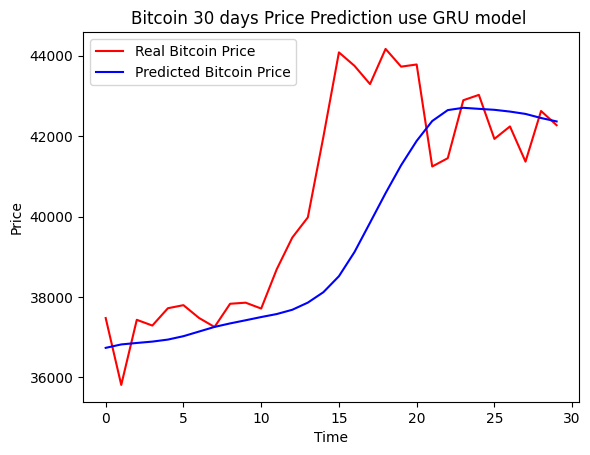

In [73]:
plt.plot(y_test_btc_GRU[:30], color = 'red', label = 'Real Bitcoin Price')
plt.plot(y_pred_btc_GRU[:30], color = 'blue', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin 30 days Price Prediction use GRU model ')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

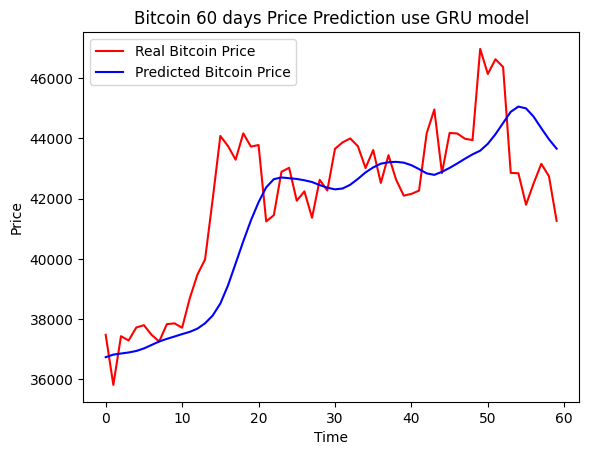

In [74]:
plt.plot(y_test_btc_GRU[:60], color = 'red', label = 'Real Bitcoin Price')
plt.plot(y_pred_btc_GRU[:60], color = 'blue', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin 60 days Price Prediction use GRU model')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

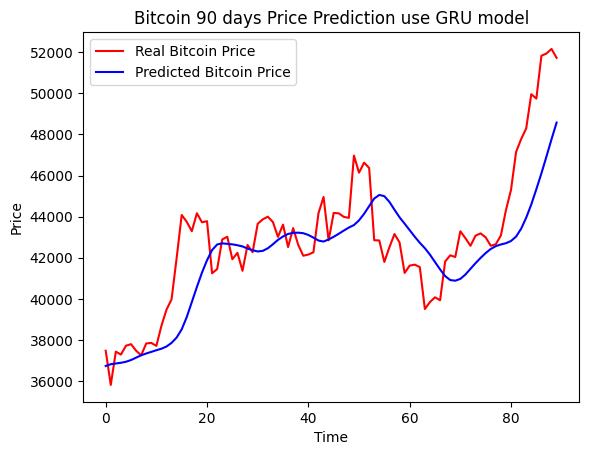

In [75]:
plt.plot(y_test_btc_GRU[:90], color = 'red', label = 'Real Bitcoin Price')
plt.plot(y_pred_btc_GRU[:90], color = 'blue', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin 90 days Price Prediction use GRU model')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

Train model for predicting Binance price

In [41]:
# The GRU architecture
model_GRU = Sequential()
# First GRU layer with Dropout regularisation
model_GRU.add(GRU(50, return_sequences=True, input_shape=(X_train_bnb.shape[1],1), activation='tanh'))
model_GRU.add(Dropout(0.2))
# Second GRU layer
model_GRU.add(GRU(50, return_sequences=True, activation='tanh'))
model_GRU.add(Dropout(0.2))
# Third GRU layer
model_GRU.add(GRU(50, return_sequences=True, activation='tanh'))
model_GRU.add(Dropout(0.2))
# Fourth GRU layer
model_GRU.add(GRU(50, activation='tanh'))
model_GRU.add(Dropout(0.2))
# The output layer
model_GRU.add(Dense(1))

In [50]:
# Compiling model
model_GRU.compile(optimizer= optimizer,loss='mean_squared_error')
# Fitting to the training set
model_GRU.fit(X_train_bnb,y_train_bnb,epochs=50,batch_size=150)

Epoch 1/50
11/11 [==============================] - 16s 302ms/step - loss: 0.1166
Epoch 2/50
11/11 [==============================] - 3s 302ms/step - loss: 0.0536
Epoch 3/50
11/11 [==============================] - 3s 318ms/step - loss: 0.0272
Epoch 4/50
11/11 [==============================] - 5s 406ms/step - loss: 0.0102
Epoch 5/50
11/11 [==============================] - 3s 299ms/step - loss: 0.0053
Epoch 6/50
11/11 [==============================] - 3s 298ms/step - loss: 0.0047
Epoch 7/50
11/11 [==============================] - 4s 412ms/step - loss: 0.0039
Epoch 8/50
11/11 [==============================] - 4s 313ms/step - loss: 0.0039
Epoch 9/50
11/11 [==============================] - 3s 301ms/step - loss: 0.0042
Epoch 10/50
11/11 [==============================] - 3s 299ms/step - loss: 0.0038
Epoch 11/50
11/11 [==============================] - 5s 441ms/step - loss: 0.0036
Epoch 12/50
11/11 [==============================] - 3s 299ms/step - loss: 0.0037
Epoch 13/50
11/11 [=====

In [51]:
y_pred_bnb_GRU = model_GRU.predict(X_test_bnb)
y_pred_bnb_GRU = scaler.inverse_transform(y_pred_bnb_GRU)
y_test_bnb_GRU = scaler.inverse_transform(y_test_bnb)

3/3 [==============================] - 3s 58ms/step


In [ ]:
# Calculate RMSE
rmse = np.sqrt(np.mean(((y_pred_bnb_GRU - y_test_bnb_GRU) ** 2)))
print('Root Mean Squared Error:', rmse)

# Calculate MAPE
mape = np.mean(np.abs((y_test_bnb_GRU - y_pred_bnb_GRU) / y_test_bnb_GRU))

print('Mean Absolute Percentage Error (MAPE):', mape)

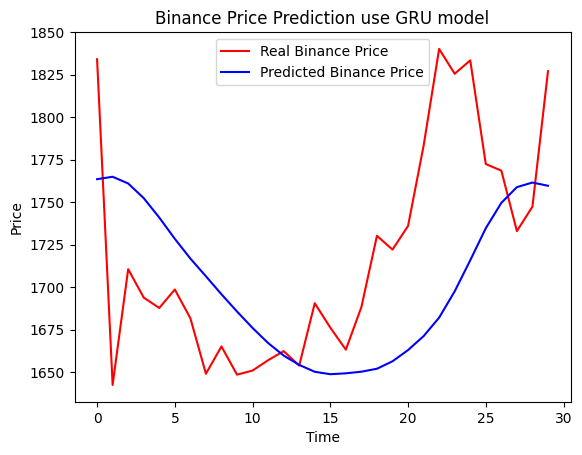

In [76]:
plt.plot(y_test_bnb_GRU[:30], color = 'red', label = 'Real Binance Price')
plt.plot(y_pred_bnb_GRU[:30], color = 'blue', label = 'Predicted Binance Price')
plt.title('Binance Price Prediction use GRU model')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

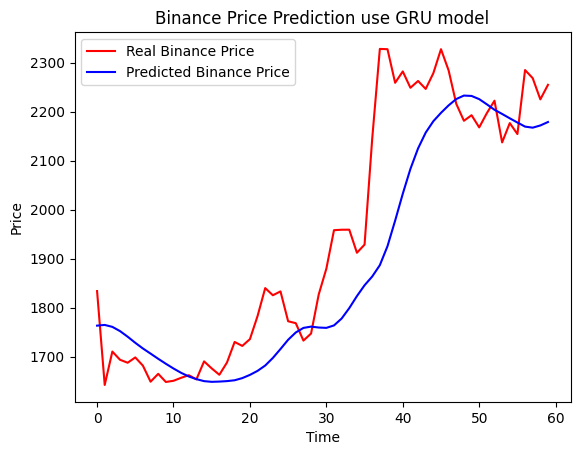

In [77]:
plt.plot(y_test_bnb_GRU[:60], color = 'red', label = 'Real Binance Price')
plt.plot(y_pred_bnb_GRU[:60], color = 'blue', label = 'Predicted Binance Price')
plt.title('Binance Price Prediction use GRU model')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

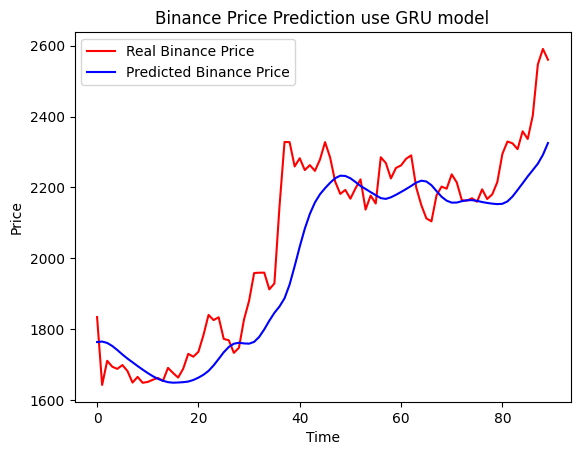

In [78]:
plt.plot(y_test_bnb_GRU[:90], color = 'red', label = 'Real Binance Price')
plt.plot(y_pred_bnb_GRU[:90], color = 'blue', label = 'Predicted Binance Price')
plt.title('Binance Price Prediction use GRU model')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

Train model for predicting Ethereum price

In [53]:
# The GRU architecture
model_GRU = Sequential()
# First GRU layer with Dropout regularisation
model_GRU.add(GRU(50, return_sequences=True, input_shape=(X_train_eth.shape[1],1), activation='tanh'))
model_GRU.add(Dropout(0.2))
# Second GRU layer
model_GRU.add(GRU(50, return_sequences=True, activation='tanh'))
model_GRU.add(Dropout(0.2))
# Third GRU layer
model_GRU.add(GRU(50, return_sequences=True, activation='tanh'))
model_GRU.add(Dropout(0.2))
# Fourth GRU layer
model_GRU.add(GRU(50, activation='tanh'))
model_GRU.add(Dropout(0.2))
# The output layer
model_GRU.add(Dense(1))

In [55]:
# Compiling model
model_GRU.compile(optimizer= optimizer,loss='mean_squared_error')
# Fitting to the training set
model_GRU.fit(X_train_eth,y_train_eth,epochs=50,batch_size=150)

Epoch 1/50
11/11 [==============================] - 10s 332ms/step - loss: 0.0997
Epoch 2/50
11/11 [==============================] - 5s 407ms/step - loss: 0.0470
Epoch 3/50
11/11 [==============================] - 4s 317ms/step - loss: 0.0269
Epoch 4/50
11/11 [==============================] - 5s 483ms/step - loss: 0.0108
Epoch 5/50
11/11 [==============================] - 6s 535ms/step - loss: 0.0043
Epoch 6/50
11/11 [==============================] - 4s 388ms/step - loss: 0.0042
Epoch 7/50
11/11 [==============================] - 8s 716ms/step - loss: 0.0040
Epoch 8/50
11/11 [==============================] - 5s 393ms/step - loss: 0.0035
Epoch 9/50
11/11 [==============================] - 4s 392ms/step - loss: 0.0034
Epoch 10/50
11/11 [==============================] - 5s 443ms/step - loss: 0.0033
Epoch 11/50
11/11 [==============================] - 5s 421ms/step - loss: 0.0032
Epoch 12/50
11/11 [==============================] - 5s 426ms/step - loss: 0.0033
Epoch 13/50
11/11 [=====

In [56]:
y_pred_eth_GRU = model_GRU.predict(X_test_eth)
y_pred_eth_GRU = scaler.inverse_transform(y_pred_eth_GRU)
y_test_eth_GRU = scaler.inverse_transform(y_test_eth)

3/3 [==============================] - 2s 36ms/step


In [57]:
# Calculate RMSE
rmse = np.sqrt(np.mean(((y_pred_eth_GRU - y_test_eth_GRU) ** 2)))
print('Root Mean Squared Error:', rmse)

# Calculate MAPE
mape = np.mean(np.abs((y_test_eth_GRU - y_pred_eth_GRU) / y_test_eth_GRU))

print('Mean Absolute Percentage Error (MAPE):', mape)

Root Mean Squared Error: 134.25400973553616
Mean Absolute Percentage Error (MAPE): 0.04192670130140932


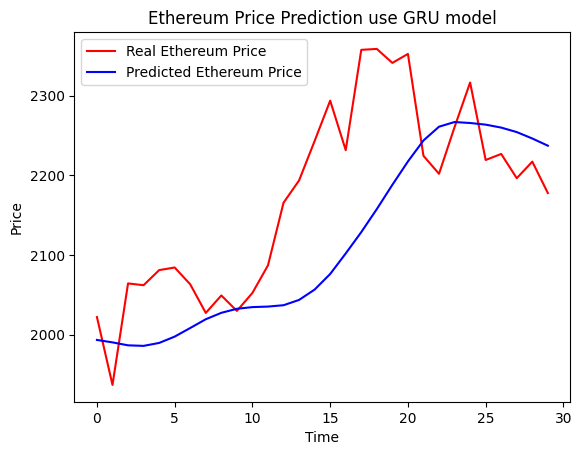

In [79]:
plt.plot(y_test_eth_GRU[:30], color = 'red', label = 'Real Ethereum Price')
plt.plot(y_pred_eth_GRU[:30], color = 'blue', label = 'Predicted Ethereum Price')
plt.title('Ethereum Price Prediction use GRU model')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

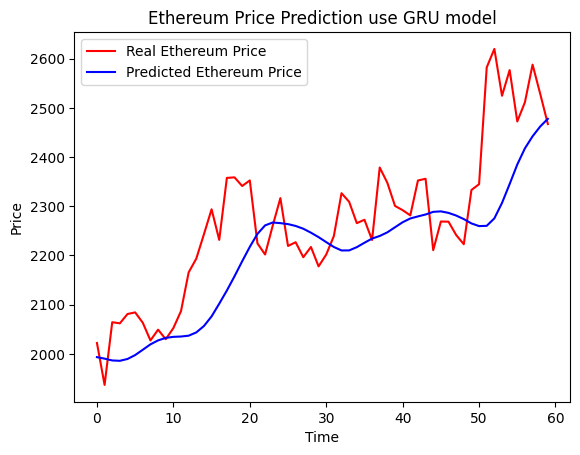

In [80]:
plt.plot(y_test_eth_GRU[:60], color = 'red', label = 'Real Ethereum Price')
plt.plot(y_pred_eth_GRU[:60], color = 'blue', label = 'Predicted Ethereum Price')
plt.title('Ethereum Price Prediction use GRU model')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

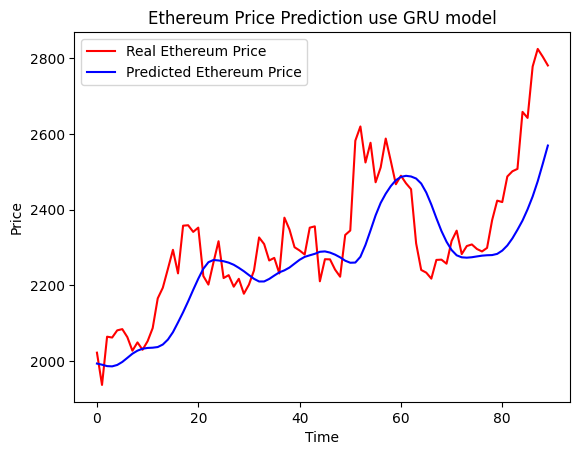

In [81]:
plt.plot(y_test_eth_GRU[:90], color = 'red', label = 'Real Ethereum Price')
plt.plot(y_pred_eth_GRU[:90], color = 'blue', label = 'Predicted Ethereum Price')
plt.title('Ethereum Price Prediction use GRU model')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()